Network Models: BA networks and the Configuration Model

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Barabási-Albert model

Number of nodes: 1000
Number of edges: 3984
Average degre: 7.968


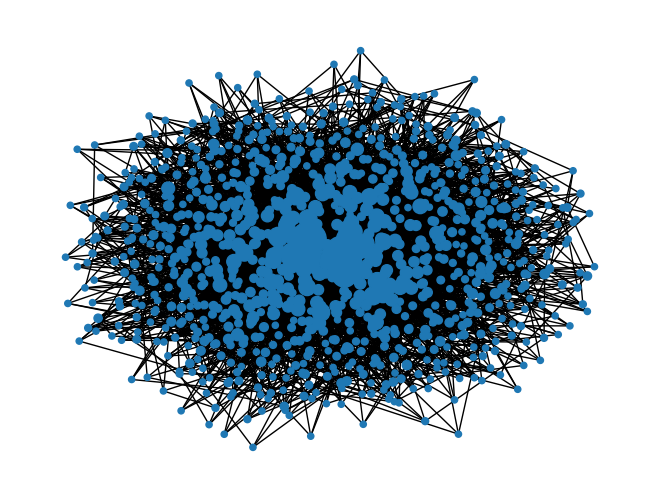

In [2]:
N = 1000
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

N = len(GBA)
M = GBA.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

d = dict(GBA.degree())
nx.draw(GBA, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show(True)

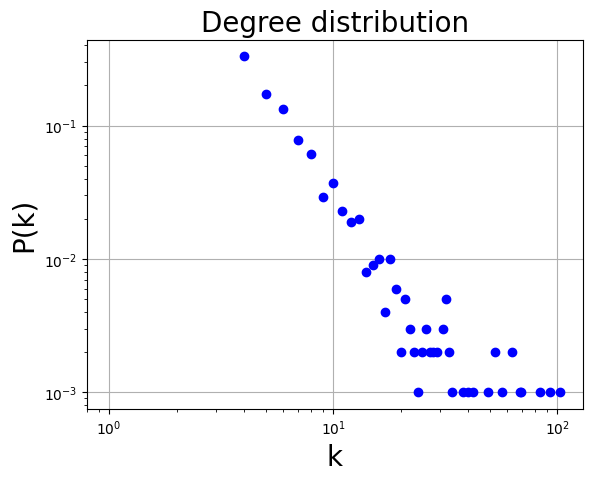

In [3]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = 0
    kvalues= arange(mink, maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues, Pk

ks, Pk = degree_distribution(GBA)

plt.figure()
plt.loglog(ks, Pk, 'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [4]:
M = np.column_stack((ks,Pk))
np.savetxt('BA_distribution.txt', M, delimiter='\t')

Configuration model

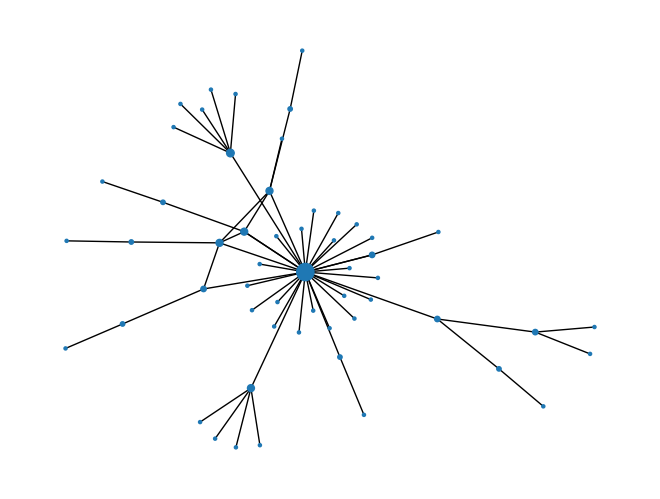

In [5]:
from random import *
import networkx as nx
N = 500
a = 3
seq = np.random.zipf(a, N) #Zipf distribution
#seq = np.random.poisson(10, N) #Poisson distribution
#print(seq)
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq)-1)
    seq[pos] = seq[pos]+ 1
#print(sum(seq))
G=nx.configuration_model(seq)
#get the largest component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
d = dict(G.degree())
nx.draw(G, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()

In [6]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 55
Number of edges: 60
Average degre: 2.1818181818181817


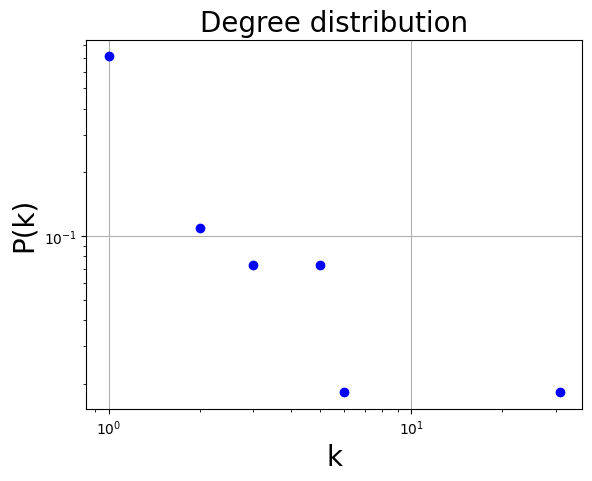

In [7]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

ks, Pk = degree_distribution(G)

plt.figure()
plt.loglog(ks,Pk,'bo')
#plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [8]:
M = np.column_stack((ks,Pk))
np.savetxt('CM_distribution.txt', M, delimiter='\t')